In [1]:
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input, BatchNormalization
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

load and preprocessing dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
x_train = x_train.reshape([60000, 28, 28, 1])
x_train = x_train / 255

x_test = x_test.reshape([10000, 28, 28, 1])
x_test = x_test / 255

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

look at one of the samples

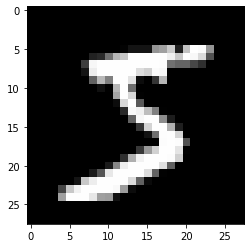

In [6]:
fig = plt.figure()
sub = fig.add_subplot()
sub.imshow(x_train[0], interpolation='nearest', cmap=mpl.cm.Greys_r)
plt.show()

build and fit model

In [7]:
model = keras.Sequential()
    
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 32)))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 2048)))
model.add(MaxPooling2D((2, 2)))
    
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1562 - accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0405 - accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 55s 29m

evaluate and save model

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0285 - accuracy: 0.9929


[0.02848934940993786, 0.992900013923645]

In [10]:
model.save('saved_model.h5')